# K-means clustering

## import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [3]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

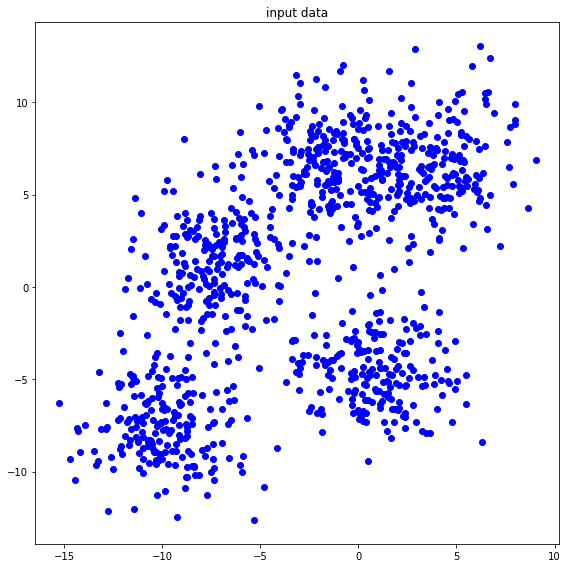

In [4]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [5]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    distance = np.sqrt(np.sum((feature - center)**2,axis = 1))



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [6]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    centroid = np.mean(feature[np.where(label_feature==label)],axis = 0)
    


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [7]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    label_feature = np.argmin(distance,axis = 1)


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [8]:
number_cluster          = 2
number_iteration        = 100    # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [9]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    for j in range(number_cluster):
        if len(np.where(label_feature_02==j)[0])==0:
            centroid_iteration_02[i] = centroid_iteration_02[i-1]
        else:
            centroid_iteration_02[i][j] = compute_centroid(feature,label_feature_02,j)
    distance = []        
    for k in range(number_cluster):
        temp = compute_distance(feature,centroid_iteration_02[i][k])
        distance = np.hstack([distance,temp])
    distance = np.transpose(np.reshape(distance,(number_cluster,distance.shape[0]//number_cluster)))
    label_feature_02 = compute_label(distance)
    loss = 0
    for q in range(number_cluster):
        loss = loss+np.sum(np.square(feature[np.where(label_feature_02==q)]-centroid_iteration_02[i][q]))
    loss_iteration_02[i] = loss
    


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

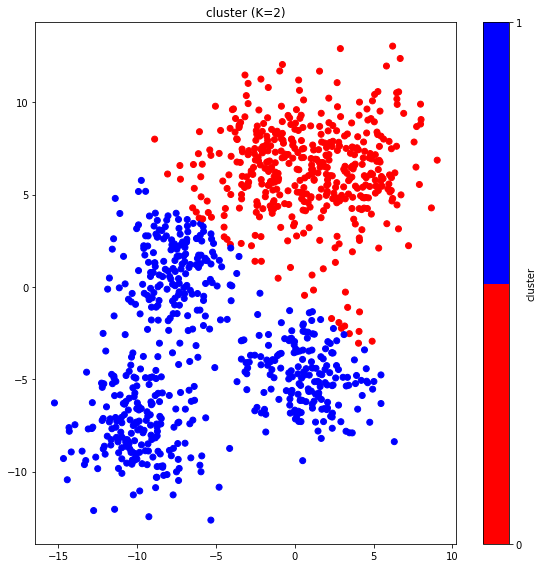

In [95]:
plt.figure(figsize=(8,8))
plt.title('cluster (K=2)')

cmap = colors.ListedColormap(['red','blue'])
norm = colors.BoundaryNorm(np.array([0,0.5,1]), cmap.N)
plt.scatter(feature[:,0],feature[:,1],c = label_feature_02,norm = norm,cmap = cmap)

plt.colorbar(ticks=np.linspace(0,1,2),label = 'cluster')


plt.tight_layout()
plt.show()

In [92]:
np.arange(0, 2)

array([0, 1])

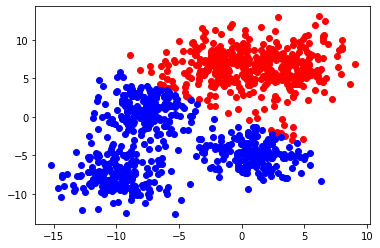

In [12]:

plt.scatter(feature[np.where(label_feature_02==0)][:,0],feature[np.where(label_feature_02==0)][:,1],color = 'red',norm = norm)
plt.scatter(feature[np.where(label_feature_02==1)][:,0],feature[np.where(label_feature_02==1)][:,1],color = 'blue',norm = norm)

In [76]:
np.linspace(0,1,2)

array([0., 1.])

In [14]:
feature[np.where(label_feature_02==0)][:,0]

array([-2.78158782e+00, -3.67216533e+00,  1.94045737e+00,  3.65244555e+00,
        1.09174399e+00, -1.47444777e+00, -1.53676402e+00,  1.38754229e+00,
        5.56187907e-01, -1.43503287e+00,  2.83790103e+00, -4.80086411e+00,
        5.28748884e+00,  2.59318403e+00,  4.07755207e+00,  5.25622742e+00,
        4.83203435e+00,  3.83353428e+00,  2.37574897e+00,  1.01336027e-01,
       -4.10588315e+00,  4.40496224e+00,  2.40428785e+00,  2.03789990e+00,
        4.60338455e+00, -2.44846063e+00, -7.50301741e-01,  6.20623116e+00,
        4.04044071e+00, -1.23752560e+00, -6.12016449e+00,  5.21323075e+00,
        3.78518979e+00, -4.09169033e+00,  3.17804309e+00, -1.11878822e+00,
       -2.18761525e+00,  1.19371235e+00,  4.08872331e+00,  6.12893927e+00,
        2.06041432e+00,  2.65829795e+00, -2.93145303e+00,  8.66621059e+00,
        5.83825903e+00, -1.26686934e+00,  3.15808332e-01,  3.60400569e+00,
        5.44962003e+00,  6.68680945e+00,  3.40313355e+00, -2.14726303e+00,
       -1.37114626e+00, -

## the number of clusters $K = 4$

In [15]:
number_cluster          = 4
number_iteration        = 2     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [16]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [17]:
number_cluster          = 8
number_iteration        = 2     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [18]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [19]:
number_cluster          = 16
number_iteration        = 2     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [20]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [21]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [22]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [23]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [24]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [25]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [26]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [27]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [28]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [29]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [30]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [31]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [32]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [33]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(feature[np.where(label_feature_02==0)][:,0],feature[np.where(label_feature_02==0)][:,1],color = 'red')

    plt.scatter(feature[np.where(label_feature_02==1)][:,0],feature[np.where(label_feature_02==1)][:,1],color = 'blue')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [34]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [35]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [36]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) = 31112.6288110970
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) =  0.0000000000
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  0.0000000000
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  0.0000000000
**************************************************
## [RESULT 05]
**************************************************


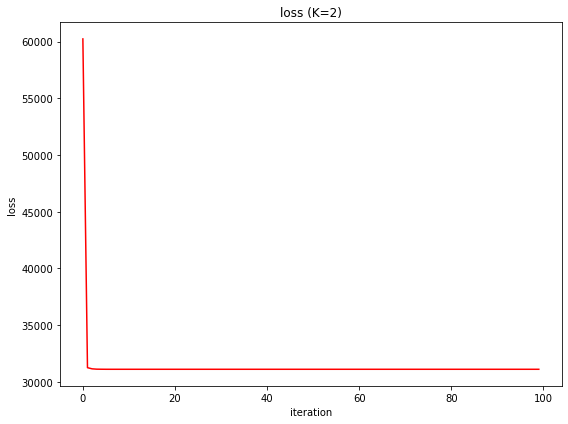

**************************************************
## [RESULT 06]
**************************************************


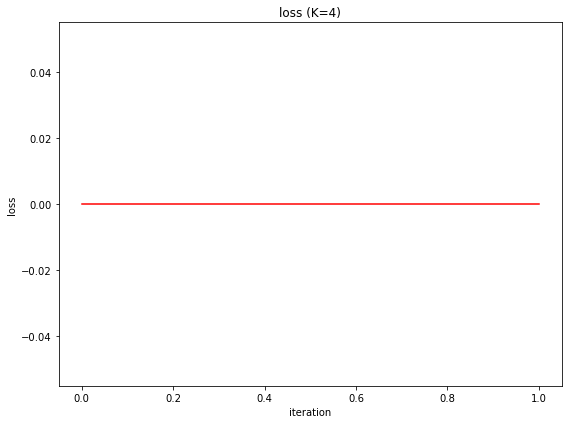

**************************************************
## [RESULT 07]
**************************************************


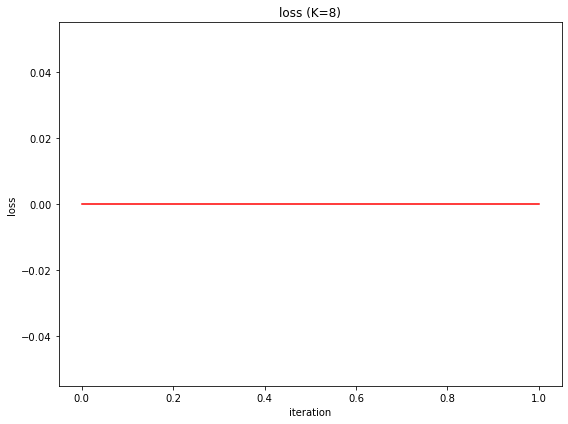

**************************************************
## [RESULT 08]
**************************************************


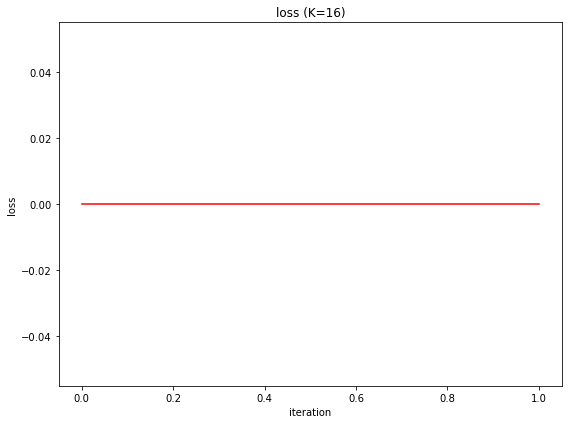

**************************************************
## [RESULT 09]
**************************************************
**************************************************
## [RESULT 10]
**************************************************
**************************************************
## [RESULT 11]
**************************************************
**************************************************
## [RESULT 12]
**************************************************
**************************************************
## [RESULT 13]
**************************************************
**************************************************
## [RESULT 14]
**************************************************
**************************************************
## [RESULT 15]
**************************************************
**************************************************
## [RESULT 16]
**************************************************


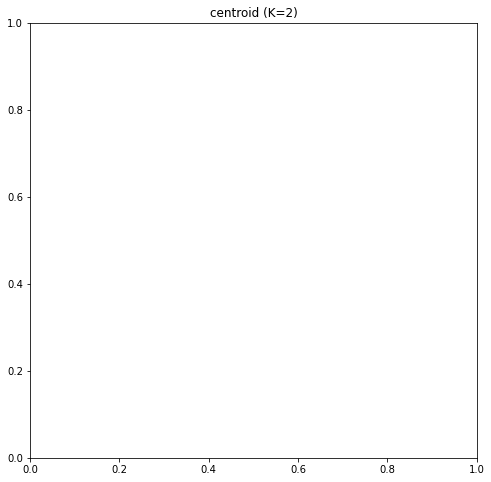

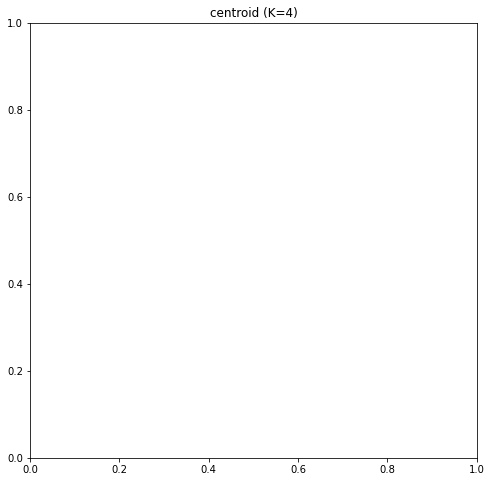

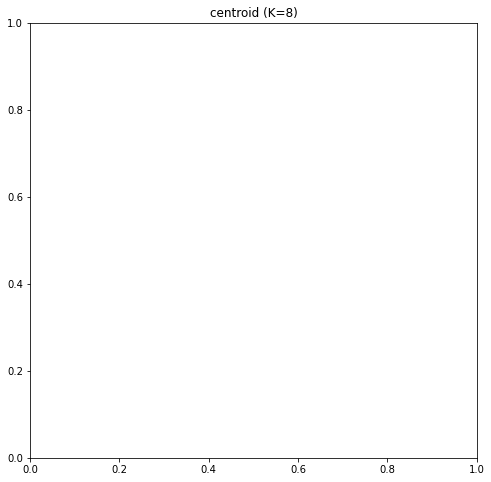

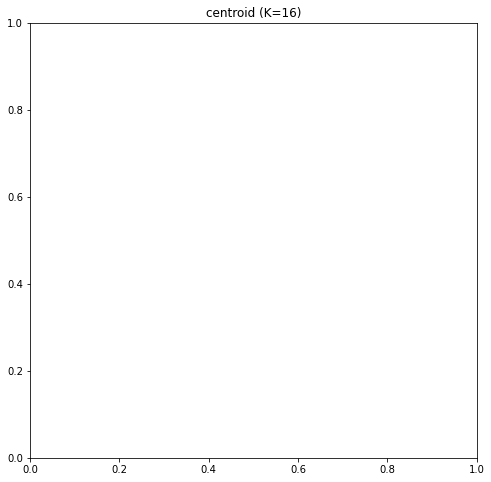

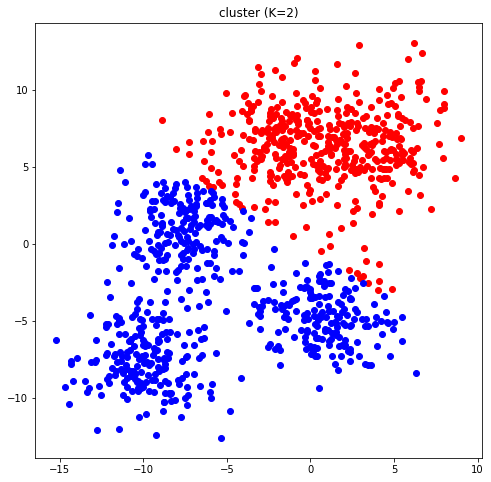

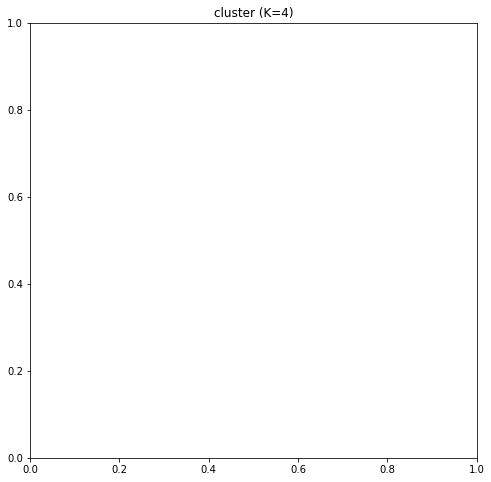

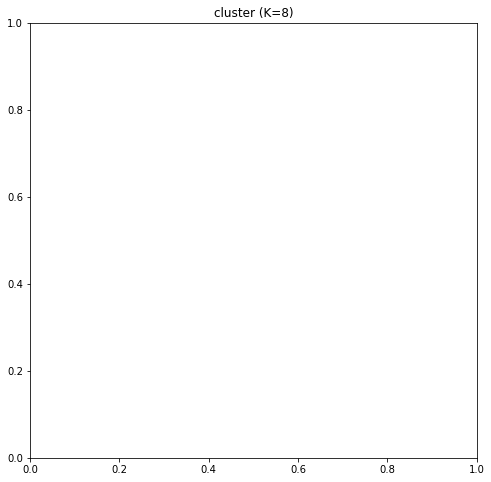

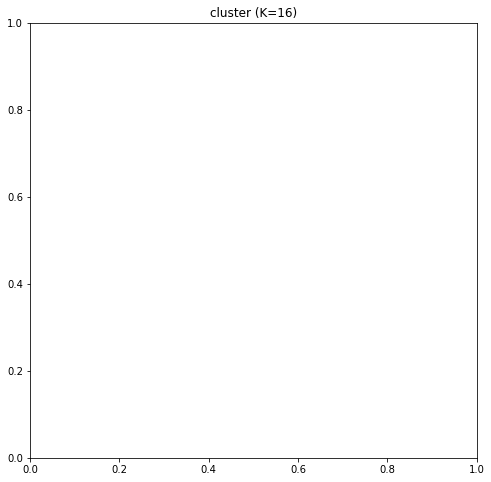

In [37]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)